# Imports

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import gzip
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Experiments description

In [4]:
description = pd.read_csv("/content/drive/My Drive/Data/plateMap.csv")
description

,Exp_ID,Image_Metadata_Site,Cell_Type,Exp_Name
0,1,1,WT,2022-03-11_steady_state_48h_deprived
1,1,2,WT,2022-03-11_steady_state_48h_deprived
2,1,3,WT,2022-03-11_steady_state_48h_deprived
3,1,4,WT,2022-03-11_steady_state_48h_deprived
4,1,5,Akt1_E17K,2022-03-11_steady_state_48h_deprived
...,...,...,...,...
119,6,20,PTEN_del,2022-04-05_steady_state_48h_deprived
120,6,21,PTEN_del,2022-04-05_steady_state_48h_deprived
121,6,22,PTEN_del,2022-04-05_steady_state_48h_deprived
122,6,23,PTEN_del,2022-04-05_steady_state_48h_deprived


*   Altogether 6 experiments were conducted
*   Each of the had 20 fields of view (last had 24)
*   Each of them took 24 hours
*   Acquisitions taken every 5 minuts
*   Amounts to 289 frames in total


# Data Exploration

## Data reading

In [5]:
path = "/content/drive/My Drive/Data/single-cell-tracks_exp1-6_noErbB2.csv.gz" # @param {type:"string"}


def unpack_and_read(f_p):
  with gzip.open(f_p, 'rt') as f:
    df = pd.read_csv(f)
  return df

df = unpack_and_read(path)

## Columns description

In [6]:
df.head()

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
0,1,1,1,0,303.000,0.704407,1.33383,932.211,875.248
1,1,1,1,1,333.000,0.848242,1.33791,932.150,874.174
2,1,1,1,2,314.000,1.059170,1.37627,932.376,873.787
3,1,1,1,3,322.000,1.188000,1.35754,932.168,873.453
4,1,1,1,4,313.999,1.205540,1.36695,931.146,872.885


In [7]:
df

,Exp_ID,Image_Metadata_Site,track_id,Image_Metadata_T,Nuclear_size,ERKKTR_ratio,FoxO3A_ratio,objNuclei_Location_Center_X,objNuclei_Location_Center_Y
0,1,1,1,0,303.0000,0.704407,1.33383,932.211,875.248
1,1,1,1,1,333.0000,0.848242,1.33791,932.150,874.174
2,1,1,1,2,314.0000,1.059170,1.37627,932.376,873.787
3,1,1,1,3,322.0000,1.188000,1.35754,932.168,873.453
4,1,1,1,4,313.9990,1.205540,1.36695,931.146,872.885
...,...,...,...,...,...,...,...,...,...
35541643,6,24,1372,253,81.9999,1.287450,1.34448,698.317,223.537
35541644,6,24,1372,254,83.0000,1.265500,1.31116,697.506,224.217
35541645,6,24,1372,255,83.0000,1.263590,1.30931,697.410,223.988
35541646,6,24,1372,256,80.0002,1.249440,1.25123,696.400,224.488


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35541648 entries, 0 to 35541647
Data columns (total 9 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Exp_ID                       int64  
 1   Image_Metadata_Site          int64  
 2   track_id                     int64  
 3   Image_Metadata_T             int64  
 4   Nuclear_size                 float64
 5   ERKKTR_ratio                 float64
 6   FoxO3A_ratio                 float64
 7   objNuclei_Location_Center_X  float64
 8   objNuclei_Location_Center_Y  float64
dtypes: float64(5), int64(4)
memory usage: 2.4 GB


**Exp_ID** - no of experiment

**Image_Metadata_Site** - no of field of view (int64)

**track_id** - no of cell tracked (int64)

**Image_Metadata_T** - no of frame for each cell tracked (int64)

**Nuclear_size** - size of nucleus

**ERKKTR_ratio** - ratio of ERK and KTR markers

**Fox03A_ratio** - ratio of ...

**objNuclei_Location_Center_X** - location of a cell along X axis in pixels (float64)

**objNuclei_Location_Center_Y** - location of a cell along Y axis in pixels (float64)





## NaNs in data

In [9]:
df.isnull().sum()

,0
Exp_ID,0
Image_Metadata_Site,0
track_id,0
Image_Metadata_T,0
Nuclear_size,0
ERKKTR_ratio,0
FoxO3A_ratio,0
objNuclei_Location_Center_X,0
objNuclei_Location_Center_Y,0


* There are no NaNs in data.

## Number of frames

Are there 258 entries for each Site and track_id?

In [10]:
counts = df.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id']).size()

counts.describe()

,0
count,196909.000000
mean,180.497834
std,100.608202
min,1.000000
25%,65.000000
50%,258.000000
75%,258.000000
max,258.000000


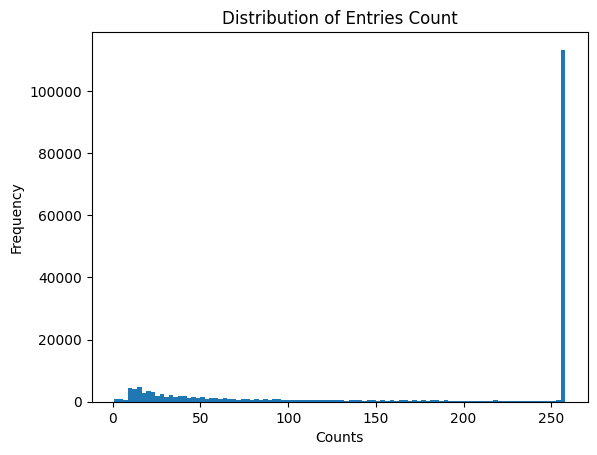

In [11]:
plt.hist(counts, bins=100)
plt.title("Distribution of Entries Count")
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

In [12]:

percentage_258 = (counts[counts == 258].count() / counts.count()) * 100
print(f'{percentage_258:.2f}% of counts have the value 258')

56.56% of counts have the value 258


## Single cell simulation

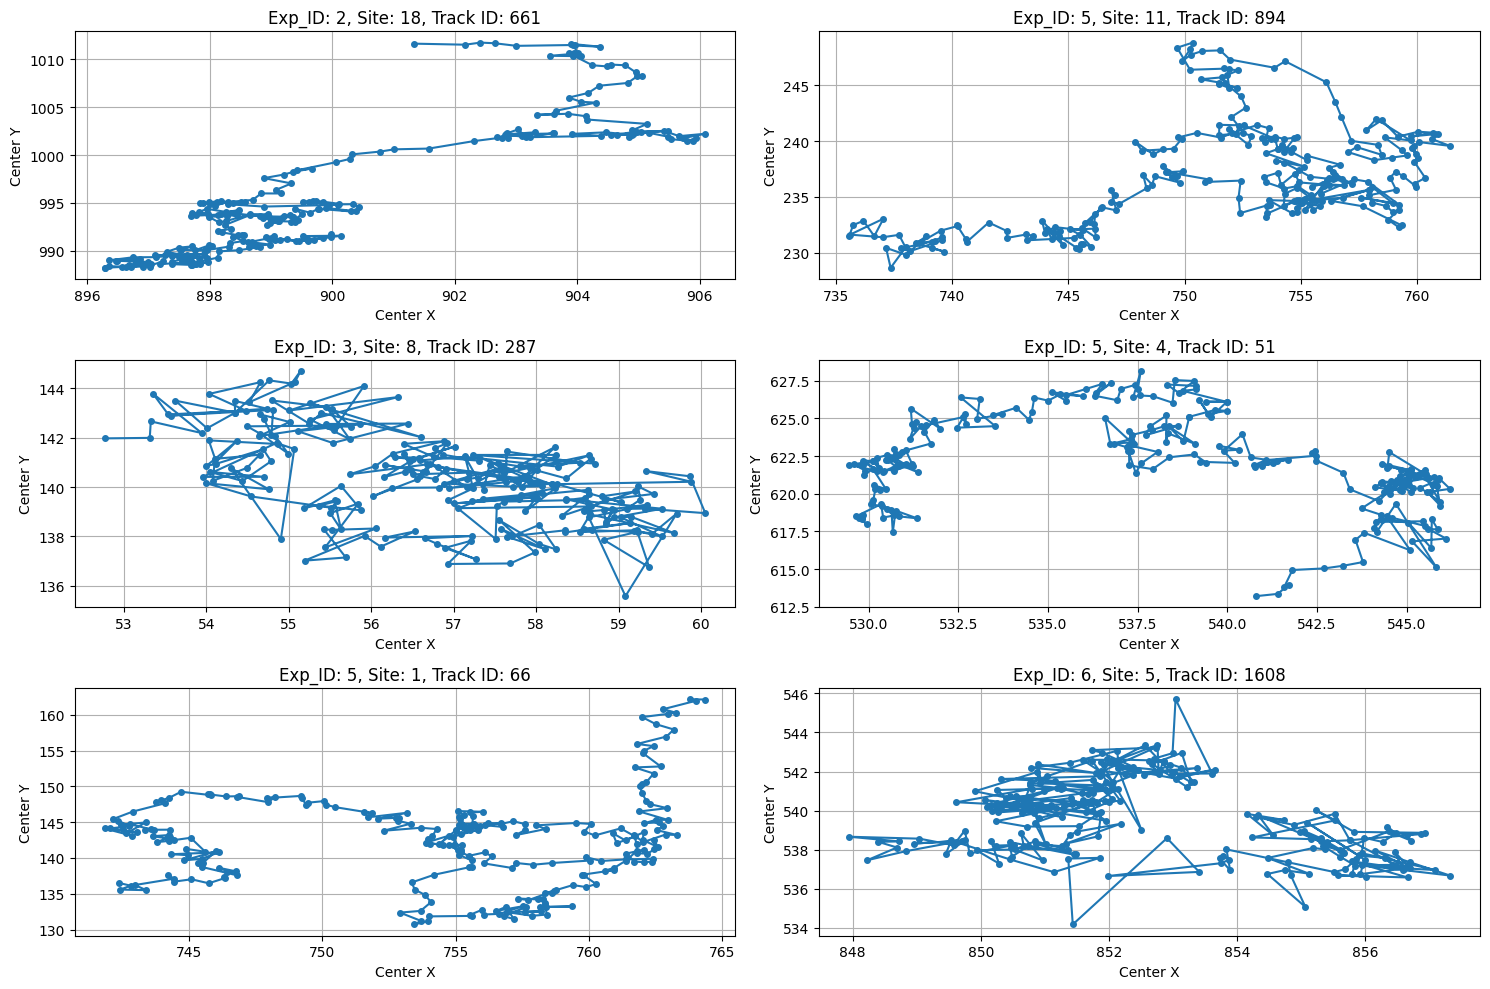

In [36]:
import matplotlib.pyplot as plt

unique_triplets = df[['Exp_ID', 'Image_Metadata_Site', 'track_id']].drop_duplicates()

sampled_triplets = unique_triplets.sample(n=6, random_state=49)

plt.figure(figsize=(15, 10))

for i, (exp_id, site, track_id) in enumerate(zip(sampled_triplets['Exp_ID'], sampled_triplets['Image_Metadata_Site'], sampled_triplets['track_id']), start=1):
    example = df[(df['Exp_ID'] == exp_id) & (df['Image_Metadata_Site'] == site) & (df['track_id'] == track_id)]
    plt.subplot(3, 2, i)
    plt.plot(example['objNuclei_Location_Center_X'], example['objNuclei_Location_Center_Y'], 'o-', markersize=4)
    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Exp_ID: {exp_id}, Site: {site}, Track ID: {track_id}')
    plt.grid(True)

plt.tight_layout()
plt.show()


* Subsequent locations are defnitely correlated
* Unpredictability frame to frame differs

## Simulation of experiment

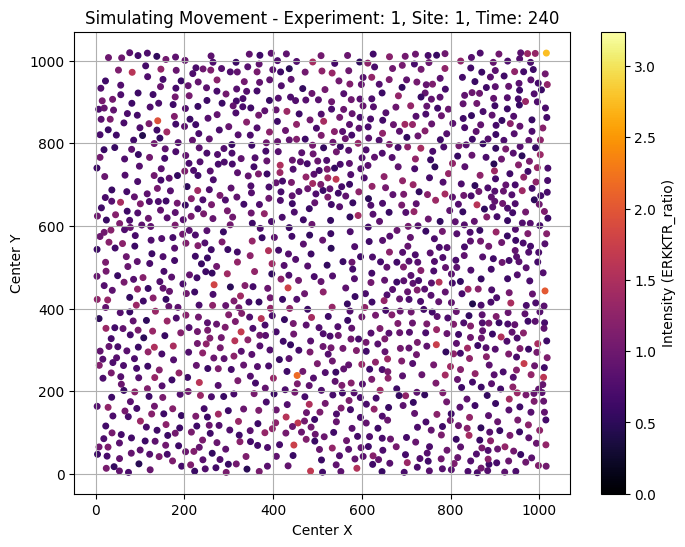

In [14]:
from IPython.display import clear_output
import time

experiment = 1
site = 1

marker = 'ERKKTR_ratio'
min_value = df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].min()
max_value = df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site)][marker].max()

for t in range(258):
    if (t % 40) != 0:
        continue

    clear_output(wait=True)

    current_frame = df[(df['Exp_ID'] == experiment) & (df['Image_Metadata_Site'] == site) & (df['Image_Metadata_T'] == t)]

    plt.figure(figsize=(8, 6))

    sc = plt.scatter(
        current_frame['objNuclei_Location_Center_X'],
        current_frame['objNuclei_Location_Center_Y'],
        s=16,
        c=current_frame[marker],
        cmap='inferno',
        vmin=min_value,
        vmax=max_value
    )

    plt.xlabel('Center X')
    plt.ylabel('Center Y')
    plt.title(f'Simulating Movement - Experiment: {experiment}, Site: {site}, Time: {t}')
    plt.grid(True)

    plt.colorbar(sc, label=f'Intensity ({marker})')

    plt.show()

    time.sleep(1)


# Statistics

## Distribution of features

Let's examine the distribution of a random marker.

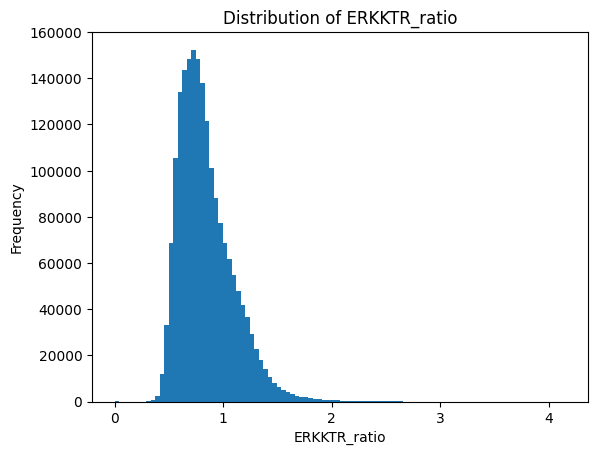

In [15]:
marker = 'ERKKTR_ratio'
site = 1

plt.hist((df[df['Image_Metadata_Site'] == site][marker]), bins=100)
plt.title(f'Distribution of {marker}')
plt.xlabel(marker)
plt.ylabel('Frequency')
plt.show()

Looking by the shape of the histogram, the distribution resembles log-normal or beta distribution.

## Correlations

Let's measure the correlation between the markers for a given experiment. We need to use Spearman correlation since we know that the distribution isn't normal.

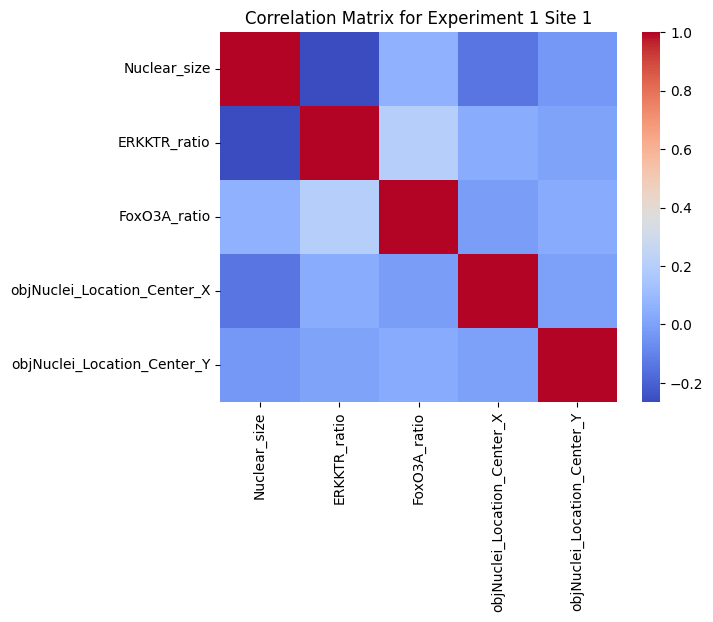

In [16]:
experiment = 1
site = 1

df_exp = df[df['Exp_ID'] == experiment]
df_site = df_exp[df_exp['Image_Metadata_Site'] == site]

df_site = df_site.drop(['Exp_ID', 'Image_Metadata_Site', 'Image_Metadata_T', 'track_id'], axis=1)

corr_matrix = df_site.corr(method="spearman")

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title(f'Correlation Matrix for Experiment {experiment} Site {site}')
plt.show()

There is a slight correlation between ERKKTR_ratio and Nuclear_size and between ERKKTR_ratio and FoxO3A_ratio.

Additionally, we can observe that the position of a cell and the markers are uncorrelated.

Let's look at the most correlated (> 0.8) pairs of markers.

In [17]:
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix
        current_corr = abs(corr.iloc[i, j])
        current_corr_pair = (corr.columns[i], corr.columns[j])

        if current_corr > 0.2:
            print(f'correlation: {current_corr}')
            print(f'correlation pair: {current_corr_pair}')
            print()


correlation: 0.26453166627495867
correlation pair: ('Nuclear_size', 'ERKKTR_ratio')

correlation: 0.20129724592469783
correlation pair: ('ERKKTR_ratio', 'FoxO3A_ratio')



## Mutation and markers' intensity

In [18]:
WT = [1, 2, 3, 4]
AKT1_E17K = [5, 6, 7, 8]
PIK3CA_E545K = [9, 10, 11, 12]
PIK3CA_H1047R = [13, 14, 15, 16]
PTEN_del = [17, 18, 19, 20, 21, 22, 23, 24]

mutation_df = pd.DataFrame(columns=['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'])

for mutation, sites in zip(['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'],
 [WT, AKT1_E17K, PIK3CA_E545K, PIK3CA_H1047R, PTEN_del]):
    current_site = df[df['Image_Metadata_Site'].isin(sites)]
    current_site = current_site.drop(['Exp_ID', 'Image_Metadata_Site', 'Image_Metadata_T', 'track_id',
                                          'objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'], axis=1)

    mutation_df[mutation] = current_site.mean()

mutation_df

,WT,AKT1_E17K,PIK3CA_E545K,PIK3CA_H1047R,PTEN_del
Nuclear_size,342.818248,288.473969,337.158347,511.552655,379.136009
ERKKTR_ratio,0.849849,0.838561,0.923678,1.056930,0.930009
FoxO3A_ratio,1.281352,1.363543,1.247696,1.284009,1.264893


We clearly see that there are significant differences between mutations and intensity of markers. Let's plot the bar charts to visualize the differences.

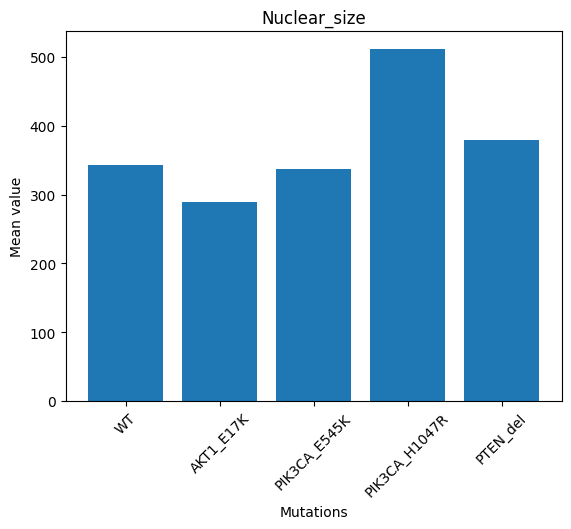

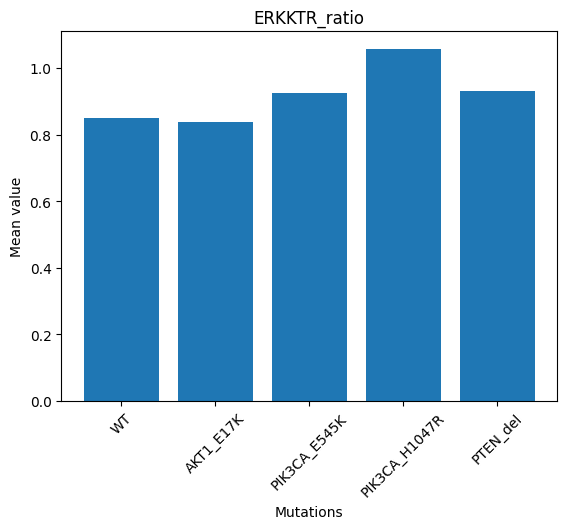

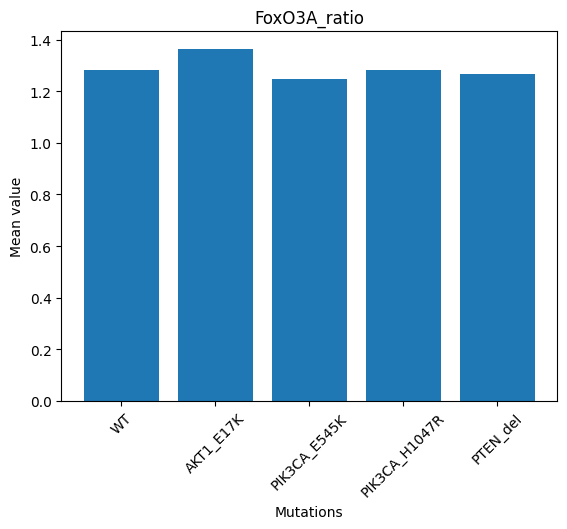

In [19]:
for i in range(len(mutation_df.index)):
    plt.bar(mutation_df.columns, mutation_df.iloc[i])
    plt.title(mutation_df.index[i])
    plt.xlabel('Mutations')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.show()

## Mutations and motility

Let's do the same for the cells motility. We have to define a measure of motality.

In [26]:

experiments = [1, 2, 3, 4, 5, 6]
df_exp = df[df['Exp_ID'] == experiment]

df_mot = df_exp.dropna(subset=['objNuclei_Location_Center_X', 'objNuclei_Location_Center_Y'])

df_sort = df_mot.sort_values(by=['Exp_ID', 'Image_Metadata_Site', 'track_id', 'Image_Metadata_T']).reset_index(drop=True)

df_sort['next_X'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_X'].shift(-1)
df_sort['next_Y'] = df_sort.groupby(['Exp_ID', 'Image_Metadata_Site', 'track_id'])['objNuclei_Location_Center_Y'].shift(-1)

df_sort['distance'] = np.sqrt((df_sort['objNuclei_Location_Center_X'] - df_sort['next_X']) ** 2 +
                              (df_sort['objNuclei_Location_Center_Y'] - df_sort['next_Y']) ** 2)

df_sort = df_sort.drop(columns=['next_X', 'next_Y']).dropna(subset=['distance'])

mutation_df = pd.DataFrame(columns=['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'])

means = []
for mutation, sites in zip(['WT', 'AKT1_E17K', 'PIK3CA_E545K', 'PIK3CA_H1047R', 'PTEN_del'],
                           [WT, AKT1_E17K, PIK3CA_E545K, PIK3CA_H1047R, PTEN_del]):
    current_site = df_sort[(df_sort['Image_Metadata_Site'].isin(sites))]
    mean_distance = current_site.groupby('Exp_ID')['distance'].mean().mean()
    means.append(mean_distance)

mutation_df.loc['motility'] = means

mutation_df


,WT,AKT1_E17K,PIK3CA_E545K,PIK3CA_H1047R,PTEN_del
motility,0.447478,0.341145,0.793161,0.910001,0.55252


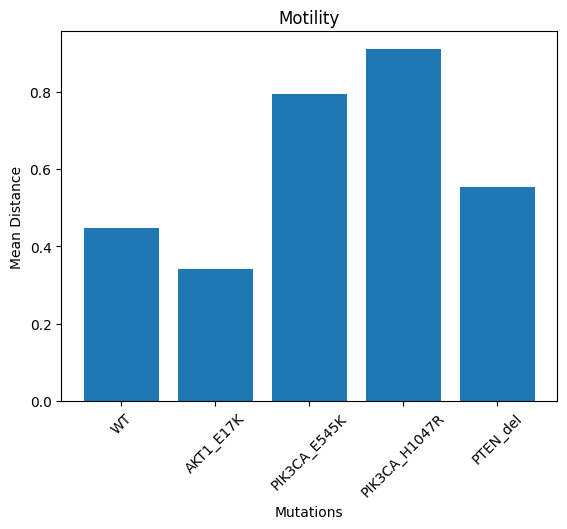

In [27]:
plt.bar(mutation_df.columns, mutation_df.iloc[0])
plt.title('Motility')
plt.xlabel('Mutations')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45)
plt.show()

Clearly, we can see that PIK3CA_H1047R and PIK3CA_E545K are more motile. The motility of the rest of cells is more or less the same.